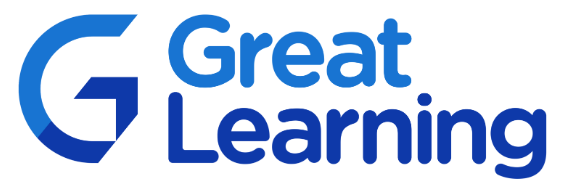

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Course 2: Week05 - Logistic Regression - Practice Exercise

---------------

##  <font color='blue'> Table Of Contents </font>
- ### <font color='blue'> Problem Statement </font>   
- ### <font color='blue'> Importing necessary libraries and reading the dataset </font>
- ### <font color='blue'> Exploratory Data Analysis</font>
- ### <font color='blue'> Data Preparation for Model Building</font>
- ### <font color='blue'> Model Building and Evaluation</font>

### <font color = 'green'> **Problem-Statement**

**Predicting the risk of CHD ten years in advance.**

Framingham Heart Study - In 1948, scientists and participants embarked on an ambitious project to identify risk factors for heart disease. Today, the study remains a world-class epicenter for cutting-edge heart, brain, bone, and sleep research.
The 10-year cardiovascular risk of an individual can be estimated with the Framingham Risk Score, including for individuals without known cardiovascular disease. The Framingham Risk Score is based on findings of the Framingham Heart Study.

You can refer to the research website here: https://www.framinghamheartstudy.org/fhs-risk-functions/hard-coronary-heart-disease-10-year-risk/

#### <font color = 'green'> **Attribute Information**
Variables used in this study:-
- **Demographic Variables** - Gender, Age in Years, Education.
- **Behavioral Factors** - Current Smoker, No. of cigarettes per day.
- **Medical History** - BP Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes

In addition, data from the first medical examination was taken into account. This
included: Total Cholesterol, Blood Pressure, BMI, Heart Rate, and Glucose.

### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [249]:
# data analysis tools
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   

# importing seaborn for statistical plots
import seaborn as sns

# Let us break the X and y dataframes into training set and test set. For this we will use
# Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# model implementation
from sklearn.linear_model import LogisticRegression

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
# %matplotlib inline  # !pip install imblearn

In [250]:
df = pd.read_csv("framingham.csv")

In [251]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



### <font color = 'green'> **Exploratory Data Analysis**

<font size=3> Perform Necessary Exploratory Data Analysis.

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [253]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [254]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [255]:
#using undersampling to fix class imbalance
df_us=pd.concat([df[df['TenYearCHD']==0].sample(644),df[df['TenYearCHD']==1]])

In [256]:
df_us['TenYearCHD'].value_counts()

TenYearCHD
0    644
1    644
Name: count, dtype: int64

### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [257]:
df.isnull().sum()*100/len(df)

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [258]:
df=df.fillna(df.mean())

In [259]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<font size=3> Q. Check for duplicate records and drop them.

In [260]:
df=df.drop_duplicates()

<font size=3> Q. Check for the presence of outliers and handle them with appropriate techniques.

<Axes: >

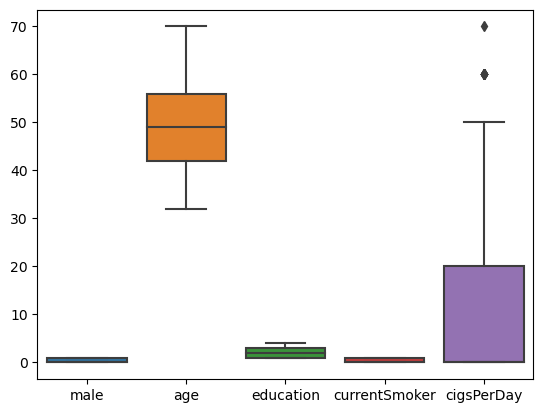

In [261]:
sns.boxplot(df[['male','age','education','currentSmoker','cigsPerDay']])

<Axes: >

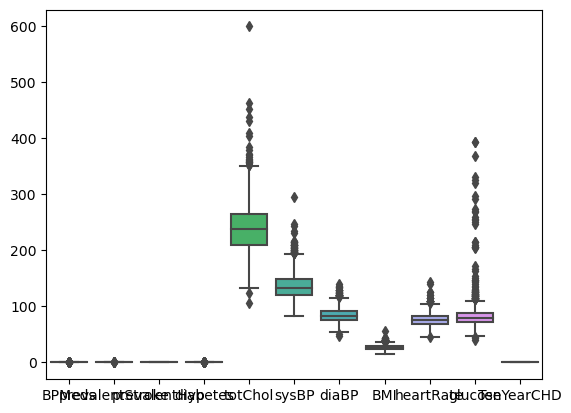

In [262]:
sns.boxplot(df_us[['BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']])

In [263]:
cat=df.columns

In [264]:
for col in cat: #['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3-1.5*iqr
    ser=df[col].copy()
    ser[ser<lower_whisker]=lower_whisker
    ser[ser<upper_whisker]=upper_whisker
    df[col]=ser

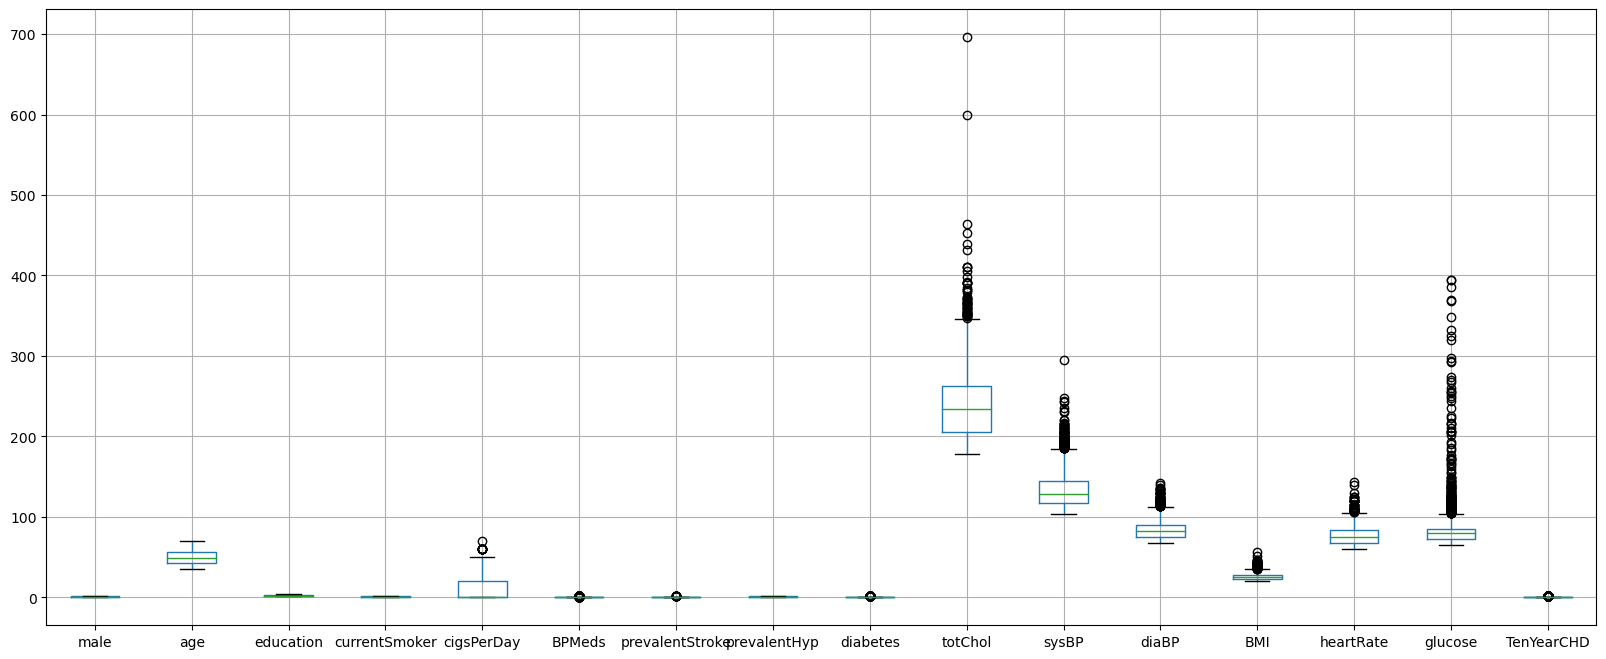

In [265]:
df.boxplot(figsize=(20,8))
plt.show()

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [266]:
X=df.drop('TenYearCHD',axis=1)
y=df[['TenYearCHD']]

In [267]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

<font size=3> Q. Scale the data using appropriate approach.

In [268]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train.iloc[:,:]=ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:]=ss.fit_transform(X_test.iloc[:,:])

In [269]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
4033,-0.854168,-0.085044,-0.964550,1.012886,0.496530,-0.177665,-0.068843,-0.668655,-0.156551,-0.108805,-0.924885,-0.273720,0.515116,1.690397,-0.093024
3710,1.170729,-0.435128,1.013508,1.012886,1.751397,-0.177665,-0.068843,1.495540,-0.156551,-1.384441,0.395735,0.609756,-0.792940,-0.971489,-0.790486
1453,1.170729,-0.435128,-0.964550,1.012886,0.914819,-0.177665,-0.068843,-0.668655,-0.156551,0.958091,-0.670029,-0.097025,-0.787820,-1.357892,-0.381629
2425,-0.854168,1.548681,-0.964550,-0.987278,-0.758336,-0.177665,-0.068843,-0.668655,-0.156551,-0.201578,-0.577354,-0.097025,-0.071078,0.144785,-0.429729
1010,1.170729,-0.901906,-0.964550,1.012886,1.751397,-0.177665,-0.068843,-0.668655,-0.156551,-0.131998,-0.971223,-1.157195,0.625187,1.175193,-0.093024


### <font color = 'green'> **Model buidling - Logistic Regression Model**

<font size=3> Q. Buid a logistic regression model and evaluate the model performance.

In [270]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [271]:
y_pred=log_reg.predict(X_test)

In [272]:
print(log_reg.intercept_)
print(log_reg.coef_)

[-1.93772213]
[[ 0.28114765  0.46644196 -0.03915576  0.02586662  0.22713763  0.04801377
   0.044319    0.05385284  0.03007451  0.09780022  0.33391549 -0.03762735
   0.02071297 -0.00344086  0.14522   ]]


In [273]:
metrics.accuracy_score(y_test,y_pred)

0.8584905660377359

In [274]:
from sklearn .metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1080    5]
 [ 175   12]]


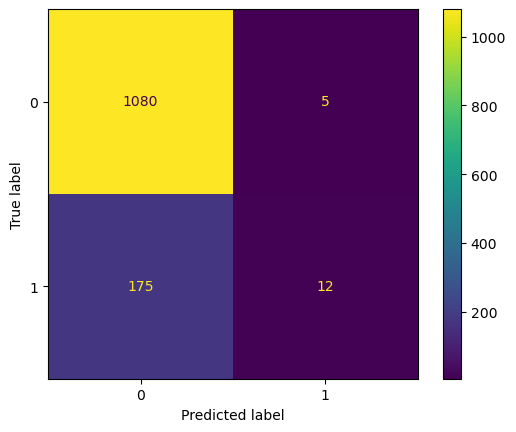

In [275]:
from sklearn .metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [276]:
from sklearn .metrics import classification_report
classification_report.(y_test,y_pred)

SyntaxError: invalid syntax (4069176203.py, line 2)

------
### Happy Learning :)
------